# Analise Chocolura

In [86]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [87]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

In [88]:
chocolura = pd.read_csv(r'C:\Users\walas\OneDrive\Área de Trabalho\Cursos DataScience\Curso 7\dados\material+curso+-+Time+Series\material curso - Time Series\chocolura.csv')

In [89]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [90]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [91]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [92]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [93]:
chocolura.mes.head()

0   2017-01-01
1   2017-02-01
2   2017-03-01
3   2017-04-01
4   2017-05-01
Name: mes, dtype: datetime64[ns]

In [94]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

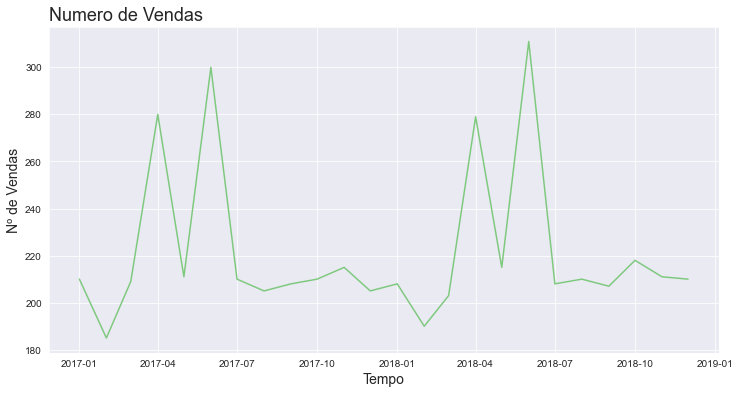

In [95]:
plotar('Numero de Vendas', 'Tempo', 'Nº de Vendas', 'mes', 'vendas', chocolura)

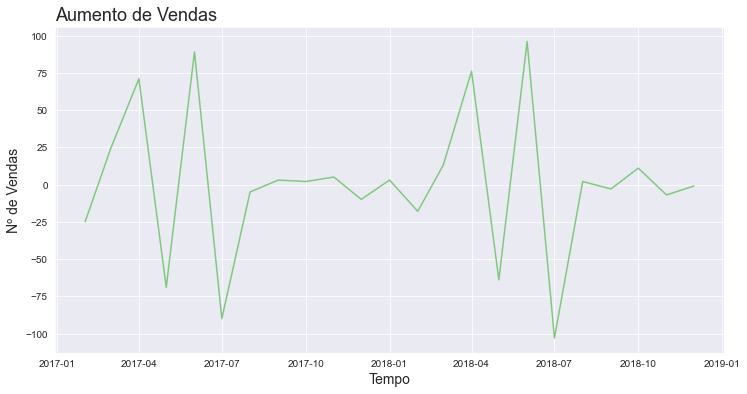

In [96]:
plotar('Aumento de Vendas', 'Tempo', 'Nº de Vendas', 'mes', 'aumento', chocolura)

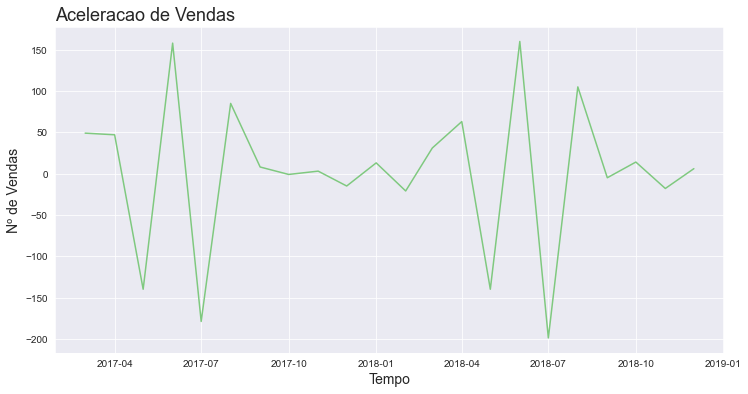

In [97]:
plotar('Aceleracao de Vendas', 'Tempo', 'Nº de Vendas', 'mes', 'aceleracao', chocolura)

# Vendas por dia - Chocolura

In [98]:
vendas_por_dia = pd.read_csv(r'C:\Users\walas\OneDrive\Área de Trabalho\Cursos DataScience\Curso 7\dados\material+curso+-+Time+Series\material curso - Time Series\vendas_por_dia.csv')

In [99]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [100]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [101]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [102]:
vendas_por_dia.dia.head()

0   2018-10-01
1   2018-10-02
2   2018-10-03
3   2018-10-04
4   2018-10-05
Name: dia, dtype: datetime64[ns]

In [103]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

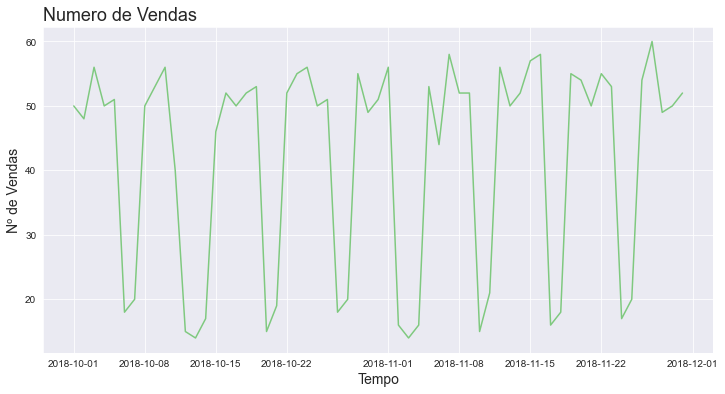

In [104]:
plotar('Numero de Vendas', 'Tempo', 'Nº de Vendas', 'dia', 'vendas', vendas_por_dia)

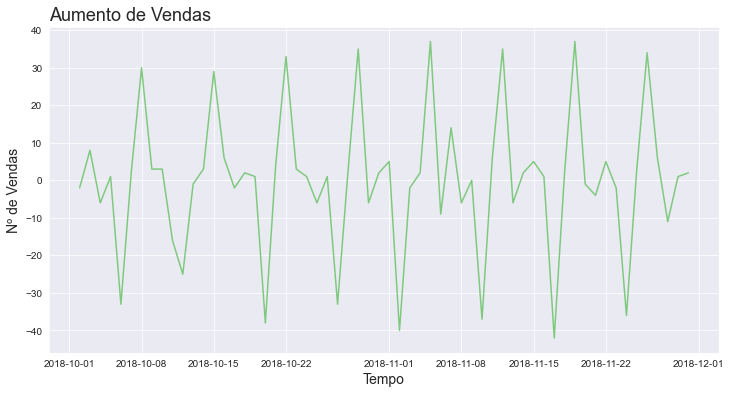

In [105]:
plotar('Aumento de Vendas', 'Tempo', 'Nº de Vendas', 'dia', 'aumento', vendas_por_dia)

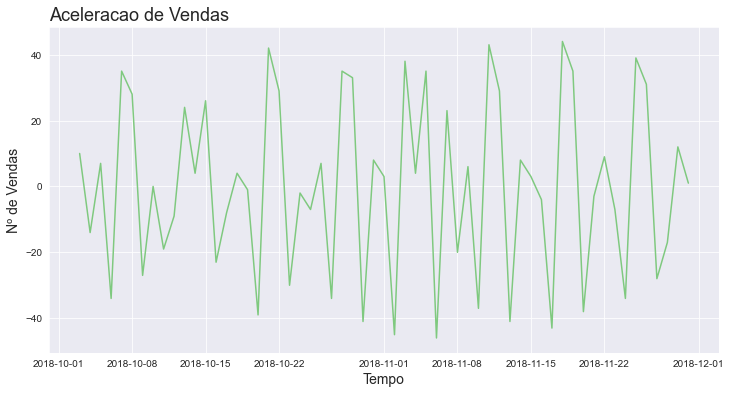

In [106]:
plotar('Aceleracao de Vendas', 'Tempo', 'Nº de Vendas', 'dia', 'aceleracao', vendas_por_dia)

## Analisando a sazonalidade

In [111]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [112]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [113]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [114]:
traducao = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado',
       'Sunday': 'Domigo'}

In [115]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(traducao)

In [117]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [120]:
vendas_por_dia.groupby('dia_da_semana').mean()

,vendas,aumento,aceleracao
dia_da_semana,,,
Domigo,18.875000,3.000000,30.750000
Quarta,53.111111,1.444444,2.111111
Quinta,51.333333,-1.777778,-3.222222
Segunda,52.333333,33.750000,30.750000
Sexta,44.555556,-6.777778,-5.000000
Sábado,15.875000,-27.750000,-19.875000
Terça,51.666667,-0.666667,-34.250000


## Analise de Correlação

In [121]:
from pandas.plotting import autocorrelation_plot

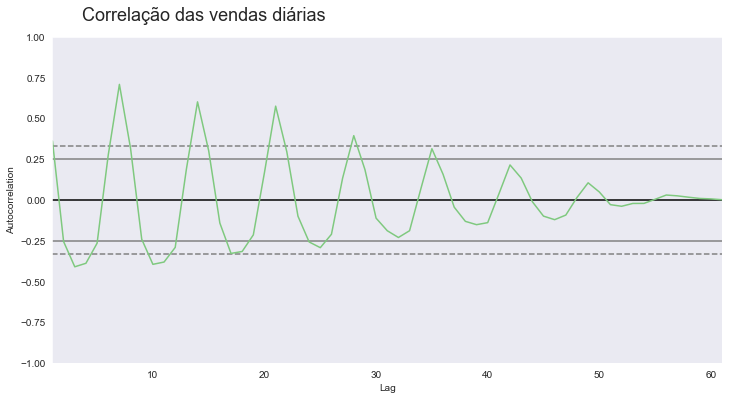

In [122]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

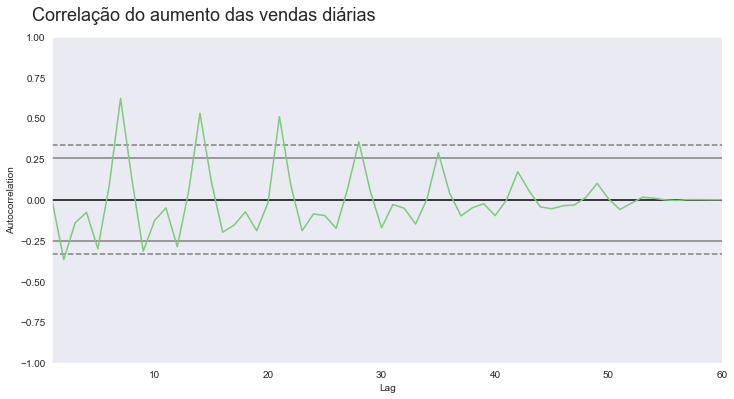

In [123]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

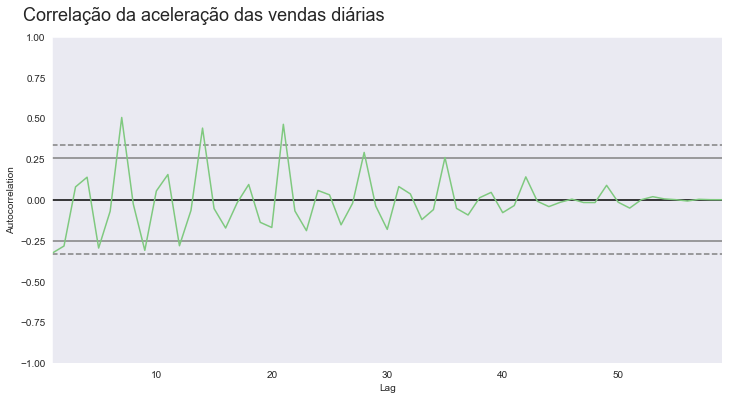

In [124]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

## Juntando Analises

In [126]:
!pip install statsmodels

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\walas\anaconda3\envs\teste\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


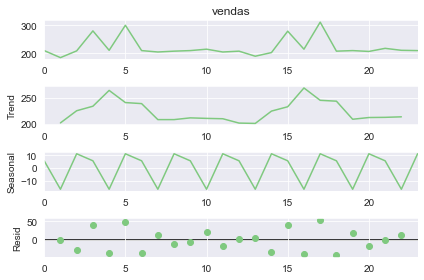

In [132]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [129]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [130]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636
